# World Cup Results analysis

In [1]:
import numpy as np
import pandas as pd
from csv import reader
import datetime as dt
import matplotlib.pyplot as plt

1. How many matches were played in each world cup year from 1930?
2. Total goals scored for each tournament year
3. All Teams who have reached finals and how many times?
4. All Teams who have reached Semi-finals and how many times?
5. How many goals and average goals scored in all semi-finals?
6. How many goals and average goals scored in all Quarter-finals?
7. How many goals and average goals scored in all Finals?
8. How many matches were played outside Quarter-finals and above?
9. Create a new Column for the outcome of every match(outcome = D for Draw, A for Away Team wins, H for Home Team wins).
10. Create a new Column for the Winner of every match.
11. Most frequent match time in the world cup history

In [2]:
wc = pd.read_csv('world_cup_results.csv')
wc.head()

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,


In [3]:
opened = open('world_cup_results.csv', encoding = 'utf8')
read = reader(opened)
wc_list = list(read)

In [4]:
def explore_data(dataset, start, end, row_column = False):
    dataslice = dataset[start:end]
    for row in dataslice:
        print(row)
        print('\n')
    if row_column:
        print('Number of rows: ',  len(dataset))
        print('Number of columns ',  len(dataset[0]))
        print('\n')

In [5]:
# Question 1 How many matches were played in each world cup year from 1930?
wc['Year'].value_counts().head()

2014    80
2010    64
2006    64
2002    64
1998    64
Name: Year, dtype: int64

Text(0.5, 1.0, 'Number of Matches Played in Each World Cup Year')

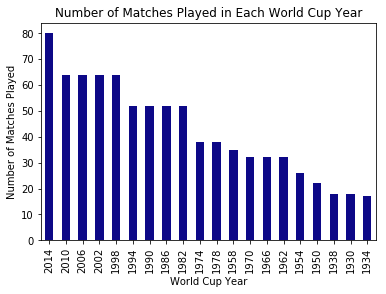

In [6]:
wc['Year'].value_counts().plot(kind = 'bar', cmap = 'plasma')
plt.ylabel('Number of Matches Played')
plt.xlabel('World Cup Year')
plt.title('Number of Matches Played in Each World Cup Year')

In [7]:
# Question 2 Total goals scored for each tournament year
wc['total_Goals'] = wc['HomeGoals'] + wc['AwayGoals']
wc.head()
wc.groupby('Year')['total_Goals'].sum().sort_values(ascending = False).head()


Year
2014    206
1998    171
2002    161
2006    147
1982    146
Name: total_Goals, dtype: int64

Text(0, 0.5, 'Number of goals scored')

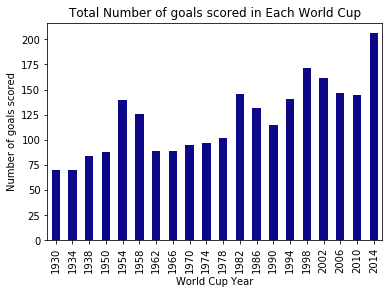

In [8]:
wc.groupby('Year')['total_Goals'].sum().plot(kind = 'bar', cmap = 'plasma')
plt.title('Total Number of goals scored in Each World Cup')
plt.xlabel('World Cup Year')
plt.ylabel('Number of goals scored')

In [9]:
# Question 3 All Teams who have reached finals and how many times?
wc_final = wc[wc['Round'] == 'Final']
wc_final.head()
final_teams = []
for teams in wc_final['HomeTeam']:
    final_teams.append(teams)
for teams in wc_final['AwayTeam']:
    final_teams.append(teams)

In [10]:
teams_in_final = pd.DataFrame(final_teams)

In [11]:
teams_in_final.head()
teams_in_final.columns = ['Teams']
teams_in_final.head()
teams_in_final['Teams'].value_counts()

Brazil            6
Argentina         6
Italy             6
Germany FR        6
Germany           3
Netherlands       3
France            2
Hungary           2
Czechoslovakia    2
England           1
Spain             1
Sweden            1
Uruguay           1
Name: Teams, dtype: int64

Text(0, 0.5, 'Teams')

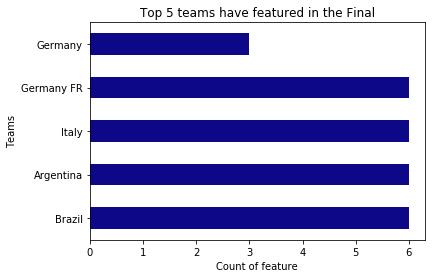

In [12]:
teams_in_final['Teams'].value_counts().head().plot(kind = 'barh', cmap = 'plasma')
plt.title('Top 5 teams have featured in the Final')
plt.xlabel('Count of feature')
plt.ylabel('Teams')

In [13]:
# Question 4 All teams that have reached the semi finals and how many times
wc_sf = wc[wc['Round'] == 'Semi-finals']

In [14]:
teams_in_sf = []
for team in wc_sf['HomeTeam']:
    teams_in_sf.append(team)
for team in wc_sf['AwayTeam']:
    teams_in_sf.append(team)

In [15]:
teams_in_sf = pd.DataFrame(teams_in_sf)

In [16]:
teams_in_sf.columns = ['Teams']
teams_in_sf['Teams'].value_counts().head()

Brazil        9
Germany FR    7
Italy         7
Germany       6
Argentina     5
Name: Teams, dtype: int64

Text(0, 0.5, 'Teams')

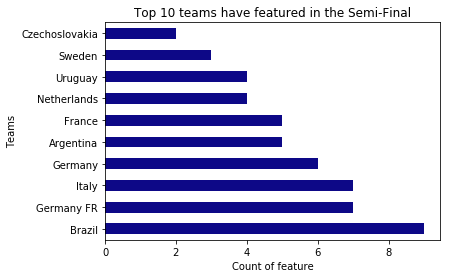

In [17]:
teams_in_sf['Teams'].value_counts().head(10).plot(kind = 'barh', cmap = 'plasma')
plt.title('Top 10 teams have featured in the Semi-Final')
plt.xlabel('Count of feature')
plt.ylabel('Teams')

In [18]:
# Question 5 How many goals and average goals scored in all semi-finals?

In [19]:
wc_sf.head()

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,total_Goals
15,1930,26-Jul-30,14:45,Semi-finals,Estadio Centenario,Montevideo,Argentina,6,1,USA,,7
16,1930,27-Jul-30,14:45,Semi-finals,Estadio Centenario,Montevideo,Uruguay,6,1,Yugoslavia,,7
31,1934,3-Jun-34,16:30,Semi-finals,San Siro,Milan,Italy,1,0,Austria,,1
32,1934,3-Jun-34,16:30,Semi-finals,Nazionale PNF,Rome,Czechoslovakia,3,1,Germany,,4
49,1938,16-Jun-38,18:00,Semi-finals,Parc des Princes,Paris,Hungary,5,1,Sweden,,6


In [20]:
total_goals_in_sf = wc_sf['total_Goals'].sum()
total_goals_in_sf

131

In [21]:
avg_goals_in_sf = wc_sf['total_Goals'].mean()
avg_goals_in_sf

3.638888888888889

In [22]:
# Question 6 How many goals and average goals scored in all quarter-finals?

In [23]:
wc_qf = wc[wc['Round'] =='Quarter-finals']

In [24]:
total_goals_in_qf = wc_qf['total_Goals'].sum()
total_goals_in_qf

180

In [25]:
avg_goals_in_qf = wc_qf['total_Goals'].mean()
avg_goals_in_qf

2.727272727272727

In [26]:
# Question 7 How many goals and average goals scored in all finals?
total_goals_in_finals = wc_final['total_Goals'].sum()
total_goals_in_finals

69

In [27]:
avg_goals_in_final = wc_final['total_Goals'].mean()
avg_goals_in_final

3.45

In [28]:
# Question 8 How many matches were played outside Quarter-finals and above?

In [29]:
wc_games = pd.read_csv('world_cup_results.csv', index_col = 'Round')

In [30]:
wc_games.drop(['Quarter-finals', 'Semi-finals', 'Final'], inplace = True)
wc_games = wc_games.reset_index()

In [31]:
wc_games['Round'].unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Preliminary round',
       'Match for third place', 'First round', 'Group 6', 'Group B',
       'Group A', 'Group 5', 'Group C', 'Group D', 'Group F', 'Group E',
       'Round of 16', 'Group H', 'Group G', 'Third place',
       'Play-off for third place'], dtype=object)

In [32]:
total_matches_played_outside_QF_and_above = len(wc_games.index)
total_matches_played_outside_QF_and_above

730

In [33]:
# Question 9 Create a new Column for the outcome of every match(outcome = D for Draw, A for Away Team wins,
#H for Home Team wins).

In [34]:
def outcome(wc):
    if (wc['HomeGoals'] > wc['AwayGoals']):
        result = 'H'
    elif (wc['HomeGoals'] < wc['AwayGoals']):
        result = 'A'
    else:
        result = 'D'
    return result

In [35]:
wc['Outcome'] = wc.apply(outcome,axis = 1)

In [36]:
wc['Outcome'].value_counts()

H    488
D    190
A    174
Name: Outcome, dtype: int64

In [37]:
# Question 10 Create a new Column for the Winner of every match (After 90 minutes)

In [38]:
def winner(wc):
    if (wc['HomeGoals'] > wc['AwayGoals']):
        result = wc['HomeTeam']
    if (wc['HomeGoals'] < wc['AwayGoals']):
        result = wc['AwayTeam']
    if (wc['HomeGoals'] == wc['AwayGoals']):
        result = 'Draw'
    return result

In [39]:
wc['winners'] = wc.apply(winner, axis = 1)

In [40]:
wc['winners'].value_counts().head()

Draw          190
Brazil         71
Italy          45
Argentina      44
Germany FR     36
Name: winners, dtype: int64

In [41]:
# Question 11 Most frequent match time in the world cup history

In [42]:
wc['Time'].value_counts().head()

 16:00     127
 21:00     109
 17:00      76
 15:00      71
 20:30      56
Name: Time, dtype: int64

In [43]:
wc['HomeGoals'].groupby(wc['HomeTeam']).mean()

HomeTeam
Algeria                   0.833333
Angola                    0.000000
Argentina                 2.055556
Australia                 1.166667
Austria                   2.384615
Belgium                   1.500000
Bolivia                   1.000000
Bosnia and Herzegovina    3.000000
Brazil                    2.195122
Bulgaria                  1.571429
Cameroon                  1.000000
Canada                    0.000000
Chile                     1.785714
China PR                  0.000000
Colombia                  1.571429
Costa Rica                1.000000
Croatia                   1.000000
Cuba                      2.500000
Czech Republic            0.000000
Czechoslovakia            2.700000
C�te d'Ivoire             1.666667
Denmark                   1.857143
Ecuador                   1.000000
England                   1.542857
France                    2.193548
German DR                 1.000000
Germany                   2.029412
Germany FR                2.302326
Ghana      